## Points per 32 Minutes Analysis 

### Overview
This notebook analyzes Points per 32 Minutes (Pts/32) for Partizan Mozzart Bet Belgrade players during the 2022-2023 EuroLeague season. Pts/32 standardizes scoring rates to a 32-minute benchmark (close to a typical starter’s playing time), enabling fair comparisons across players with varying minutes. The analysis uses the cleaned dataset `partizan_2022_cleaned.csv` and includes:
- Loading and filtering the dataset.
- Calculating Pts/32 and identifying top performers.
- Validating the calculation for a specific player.
- Visualizing results with a bar plot.
- Comparing regular season and playoff performance.

This provides insights into scoring efficiency, useful for coaching or further statistical analysis.

In [8]:
import pandas as pd

file_path = "../data/partizan_2022_cleaned.csv"

df = pd.read_csv(file_path)

Separate player-specific data from team totals to focus on individual Pts/32 calculations.

In [9]:
# filter 
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
team = df[df['player'] == 'PARTIZAN MOZZART BET BELGRADE'].copy()

### Scoring Efficiency: Pts/32  
Compute Pts/32 for each player to assess scoring efficiency standardized to 32 minutes.

### Formula  
Pts/32 = (Points / Total Seconds) × 1920  
(1920 seconds = 32 minutes)

In [10]:
# calculate Points per 32 Minutes (close to typical starter's minutes)
# formula: (Points / Total Seconds) * 1920 (where 1920 seconds = 32 minutes)
players['points_per_32'] = (players['points'] / players['total_seconds']) * 1920

# handle division by zero (players with 0 seconds)
players['points_per_32'] = players['points_per_32'].fillna(0).replace([float('inf'), -float('inf')], 0)

# average points per 32 minutes per player
avg_points_per_32 = players.groupby('player')['points_per_32'].mean().sort_values(ascending=False).head(14)


print("Top 5 players by Points per 32 Minutes:")
print(avg_points_per_32.head(5))

Top 5 players by Points per 32 Minutes:
player
Punter Kevin        18.341875
Exum Dante          18.070395
Smailagic Alen      17.346076
Lessort Mathias     12.758641
Avramovic Aleksa    12.523459
Name: points_per_32, dtype: float64


Kevin Punter leads with 18.34 Pts/32, followed closely by Dante Exum (18.07), highlighting their scoring efficiency.

Verify the Pts/32 calculation for Kevin Punter by comparing the computed average with a manual calculation from raw averages.

In [11]:
# check: Validate a specific player's Pts/32 with raw averages
player_to_check = 'Punter Kevin'  
check_player = players[players['player'] == player_to_check]
raw_means = check_player[['points', 'total_seconds']].mean()
computed_pts32 = check_player['points_per_32'].mean()

# manual calculation from averages
manual_pts32 = (raw_means['points'] / raw_means['total_seconds']) * 1920 if raw_means['total_seconds'] > 0 else 0

print(f"\nCheck for {player_to_check}:")
print(f"Computed Pts/32 from mean of per-game values: {computed_pts32:.2f}")
print(f"Manual Pts/32 from averaged stats: {manual_pts32:.2f}")
print(f"Raw Averages - Points: {raw_means['points']:.2f}, Total Seconds: {raw_means['total_seconds']:.2f}")


Check for Punter Kevin:
Computed Pts/32 from mean of per-game values: 18.34
Manual Pts/32 from averaged stats: 18.45
Raw Averages - Points: 16.08, Total Seconds: 1673.49


The computed (18.34) and manual (18.45) Pts/32 values are nearly identical, with a slight difference due to averaging methods, confirming the calculation’s reliability.

Generate a bar plot to visualize the Pts/32.

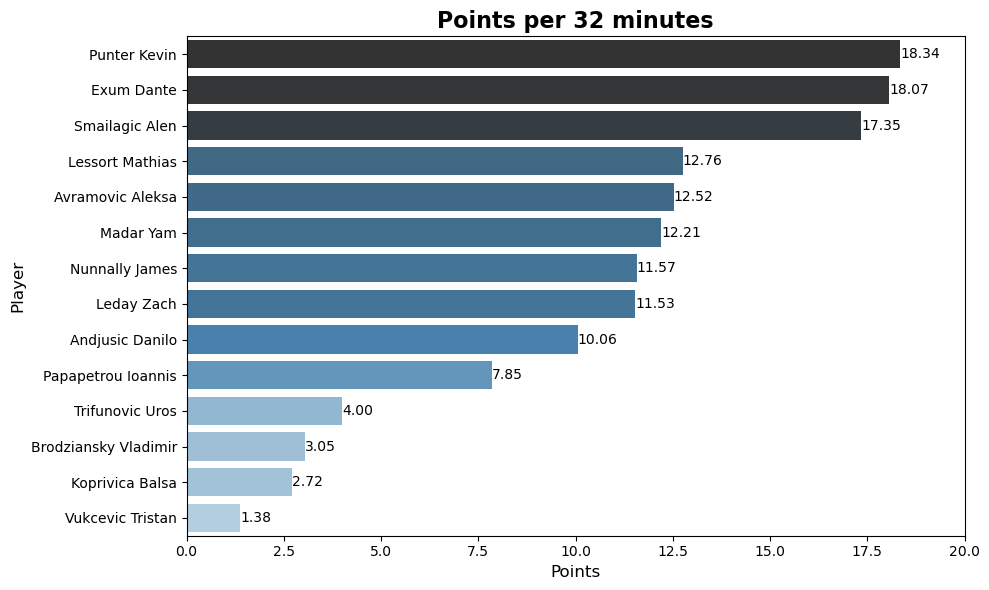

In [12]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ploting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_points_per_32.values, y=avg_points_per_32.index, hue=avg_points_per_32.values, palette='Blues_d', legend=False)
plt.title('Points per 32 minutes', fontsize=16, fontweight='bold')
plt.xlabel('Points', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0,20)

# add values to the bars
for i, v in enumerate(avg_points_per_32.values):
    ax.text(v , i, f'{v:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

A horizontal bar plot display players by Pts/32, with values annotated (e.g., Punter Kevin at 18.34). The blue palette and clear labels enhance readability.

Compare Pts/32 between regular season and playoffs to identify players who improve in high-pressure games.

In [13]:
# compare regular season and playoff performance
# split into regular season and playoffs
regular_players = players[players['phase'] == 'REGULAR SEASON'].copy()
playoff_players = players[players['phase'] == 'PLAYOFFS'].copy()

# calculate Pts/32 for regular season using totals
regular_totals = regular_players.groupby('player').agg({
    'points': 'sum',
    'total_seconds': 'sum'
})
regular_totals['pts32_regular'] = (regular_totals['points'] / regular_totals['total_seconds']) * 1920
regular_totals['pts32_regular'] = regular_totals['pts32_regular'].fillna(0).replace([float('inf'), -float('inf')], 0)

# calculate Pts/32 for playoffs using totals
playoff_totals = playoff_players.groupby('player').agg({
    'points': 'sum',
    'total_seconds': 'sum'
})
playoff_totals['pts32_playoff'] = (playoff_totals['points'] / playoff_totals['total_seconds']) * 1920
playoff_totals['pts32_playoff'] = playoff_totals['pts32_playoff'].fillna(0).replace([float('inf'), -float('inf')], 0)

# combine and compute difference
combined_pts32 = pd.DataFrame({
    'pts32_regular': regular_totals['pts32_regular'],
    'pts32_playoff': playoff_totals['pts32_playoff']
}).fillna(0)
combined_pts32['pts32_diff'] = combined_pts32['pts32_playoff'] - combined_pts32['pts32_regular']



top_5_pts32_diff = combined_pts32.sort_values('pts32_diff', ascending=False).head(5)
print("\nTop 5 Players by Pts/32 Difference (Playoffs - Regular Season):")
print(top_5_pts32_diff)


Top 5 Players by Pts/32 Difference (Playoffs - Regular Season):
                    pts32_regular  pts32_playoff  pts32_diff
player                                                      
Punter Kevin            18.032506      22.483210    4.450704
Smailagic Alen          15.309051      19.468347    4.159296
Vukcevic Tristan         5.240395       9.343066    4.102671
Papapetrou Ioannis       7.846767      11.446501    3.599734
Leday Zach              11.367509      14.751547    3.384038


Kevin Punter shows the largest increase (4.45 points), indicating a significant boost in playoff scoring efficiency.

Validate specific player (Kevin Punter’s) Pts/32 in regular season and playoffs using total points and seconds. 

In [14]:
# validate for a specific player
player_to_check = 'Punter Kevin'
for phase_name, phase_df in [('Regular Season', regular_players), ('Playoffs', playoff_players)]:
    check_player = phase_df[phase_df['player'] == player_to_check]
    if check_player.empty:
        print(f"\n{player_to_check} has no games in {phase_name}")
        continue
    total_points = check_player['points'].sum()
    total_seconds = check_player['total_seconds'].sum()
    pts32 = (total_points / total_seconds) * 1920 if total_seconds > 0 else 0
    print(f"\n{player_to_check} - {phase_name}:")
    print(f"Total Points: {total_points}, Total Seconds: {total_seconds}")
    print(f"Pts/32: {pts32:.2f}")


Punter Kevin - Regular Season:
Total Points: 527, Total Seconds: 56112
Pts/32: 18.03

Punter Kevin - Playoffs:
Total Points: 68, Total Seconds: 5807
Pts/32: 22.48


The results match the earlier comparison (18.03 vs. 22.48), validating the phase-specific Pts/32 calculations.

### Conclusion  
This analysis:  

- Identified **Kevin Punter** as the top Pts/32 performer (18.34 overall), showcasing his scoring efficiency.  
- Highlighted **Smailagic Alen**, who, despite averaging only 5.4 points per game, achieved an impressive 17.35 Pts/32 (third overall), demonstrating his scoring efficiency when adjusted for playing time.  
- Confirmed calculation accuracy through validation for Punter.  
- Visualized the top 14 players effectively, with Punter, Exum, and Smailagic leading.  
- Showed Punter’s 4.45-point Pts/32 increase in playoffs, indicating his ability to perform under pressure, while Smailagic also improved significantly (4.16-point increase).  

These insights can inform coaching strategies, such as increasing Smailagic’s minutes to leverage his efficiency.